In [172]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from data_loading import read_table_to_df

In [173]:
df = read_table_to_df(table_name="CHURN_TRAIN_TEST_DATASET")
df.head()

Data from CHURN_TRAIN_TEST_DATASET loaded successfully!


,RowNumber,CustomerId,Surname,Age,EstimatedSalary,Balance,CreditScore,NumOfProducts,Geography,Gender,HasCrCard,IsActiveMember,Exited
0,1968,15598088,Ni,25,163221.22,0.00,559.0,2,Spain,Male,True,True,False
1,4126,15633378,Davidson,49,178342.63,0.00,692.0,2,Spain,Female,True,False,False
2,5850,15608873,Smith,51,53353.36,0.00,665.0,1,France,Male,False,False,False
3,4135,15684147,Palerma,43,79649.62,102338.19,678.0,1,France,Male,True,True,False
4,8130,15729246,Hardacre,31,76326.67,0.00,847.0,2,Spain,Male,True,True,False


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        4999 non-null   int64  
 1   CustomerId       4999 non-null   int64  
 2   Surname          4999 non-null   object 
 3   Age              4999 non-null   int64  
 4   EstimatedSalary  4999 non-null   float64
 5   Balance          4999 non-null   float64
 6   CreditScore      4999 non-null   float64
 7   NumOfProducts    4999 non-null   int64  
 8   Geography        4999 non-null   object 
 9   Gender           4999 non-null   object 
 10  HasCrCard        4999 non-null   bool   
 11  IsActiveMember   4999 non-null   bool   
 12  Exited           4999 non-null   bool   
dtypes: bool(3), float64(3), int64(4), object(3)
memory usage: 405.3+ KB


In [175]:
df.nunique()

RowNumber          4999
CustomerId         4999
Surname            2040
Age                  69
EstimatedSalary    4999
Balance            3199
CreditScore         445
NumOfProducts         4
Geography             3
Gender                2
HasCrCard             2
IsActiveMember        2
Exited                2
dtype: int64

In [176]:
df = df.drop(columns=['RowNumber','CustomerId','Surname'])
numerical_cols = ['Age', 'EstimatedSalary', 'Balance','CreditScore', 'NumOfProducts'] 
categorical_cols = ['Geography','Gender', 'HasCrCard', 'IsActiveMember']
target_col = 'Exited'

In [177]:
df[categorical_cols] = df[categorical_cols].astype(object)
df.dtypes

Age                  int64
EstimatedSalary    float64
Balance            float64
CreditScore        float64
NumOfProducts        int64
Geography           object
Gender              object
HasCrCard           object
IsActiveMember      object
Exited                bool
dtype: object

In [178]:
df.shape

(4999, 10)

In [179]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Balance            0
CreditScore        0
NumOfProducts      0
Geography          0
Gender             0
HasCrCard          0
IsActiveMember     0
Exited             0
dtype: int64

In [180]:
df[numerical_cols].describe()

,Age,EstimatedSalary,Balance,CreditScore,NumOfProducts
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,38.914383,100208.419092,76976.926495,651.147429,1.522905
std,10.586515,57512.720871,62555.069479,96.089588,0.578584
min,18.000000,90.070000,0.000000,350.000000,1.000000
25%,32.000000,50512.610000,0.000000,584.000000,1.000000
50%,37.000000,100403.050000,97738.970000,652.000000,1.000000
75%,44.000000,149170.585000,127572.975000,717.000000,2.000000
max,92.000000,199992.480000,238387.560000,850.000000,4.000000


In [181]:
df[categorical_cols].describe()

,Geography,Gender,HasCrCard,IsActiveMember
count,4999,4999,4999,4999
unique,3,2,2,2
top,France,Male,True,True
freq,2512,2704,3536,2545


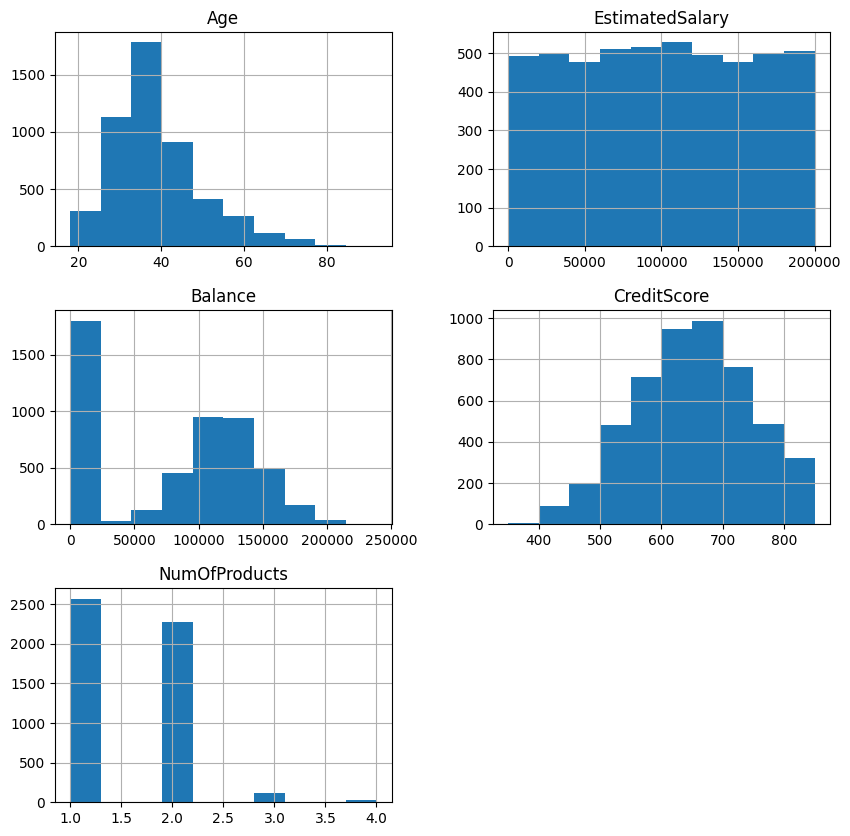

In [182]:
df.hist(figsize=(10, 10)) 
plt.show()

c:\Users\iman.hadi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\iman.hadi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\iman.hadi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\iman.hadi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a fut

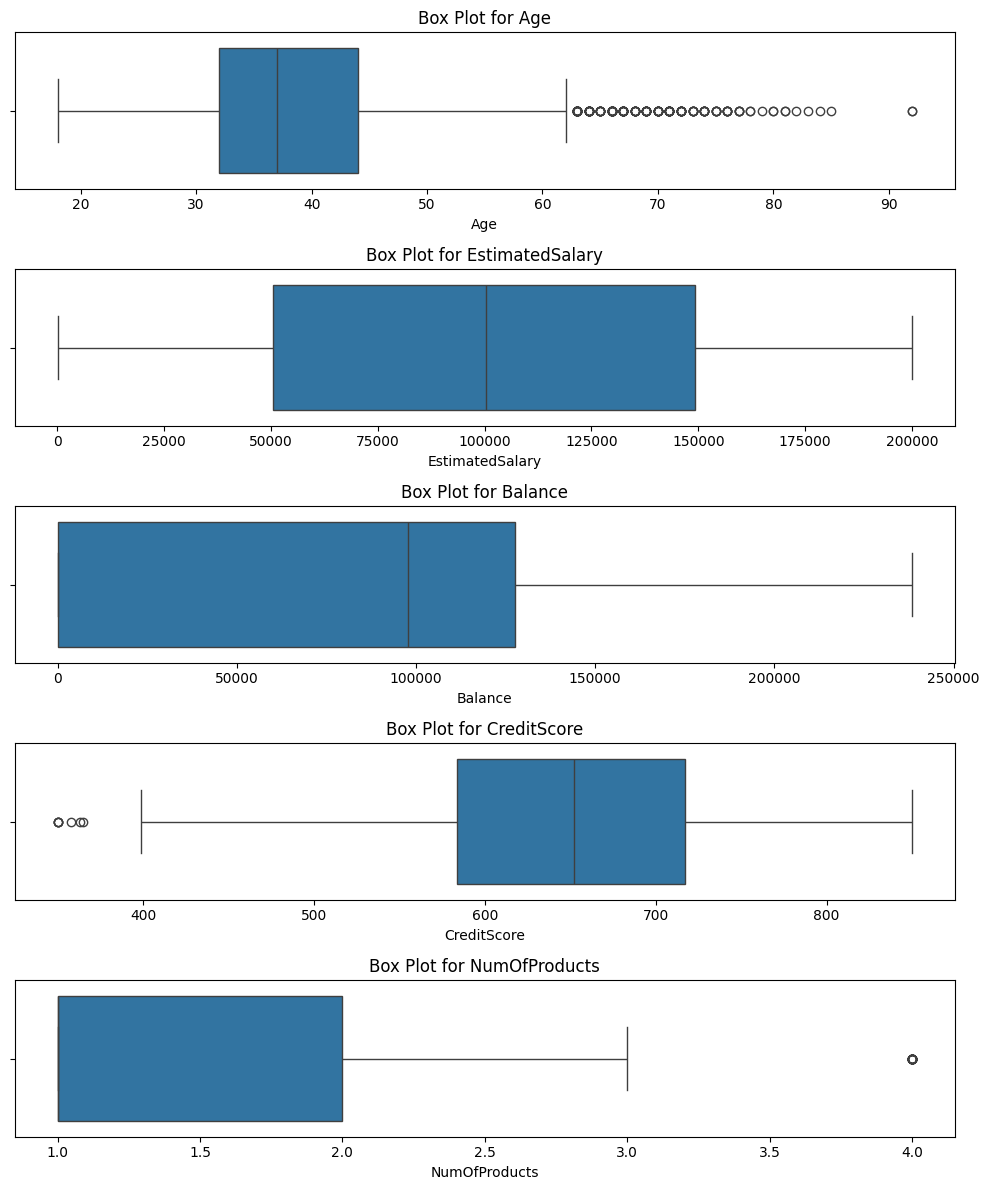

In [183]:
n_cols = 2  
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  

plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')
    plt.xlabel(col)

plt.tight_layout() 
plt.show()

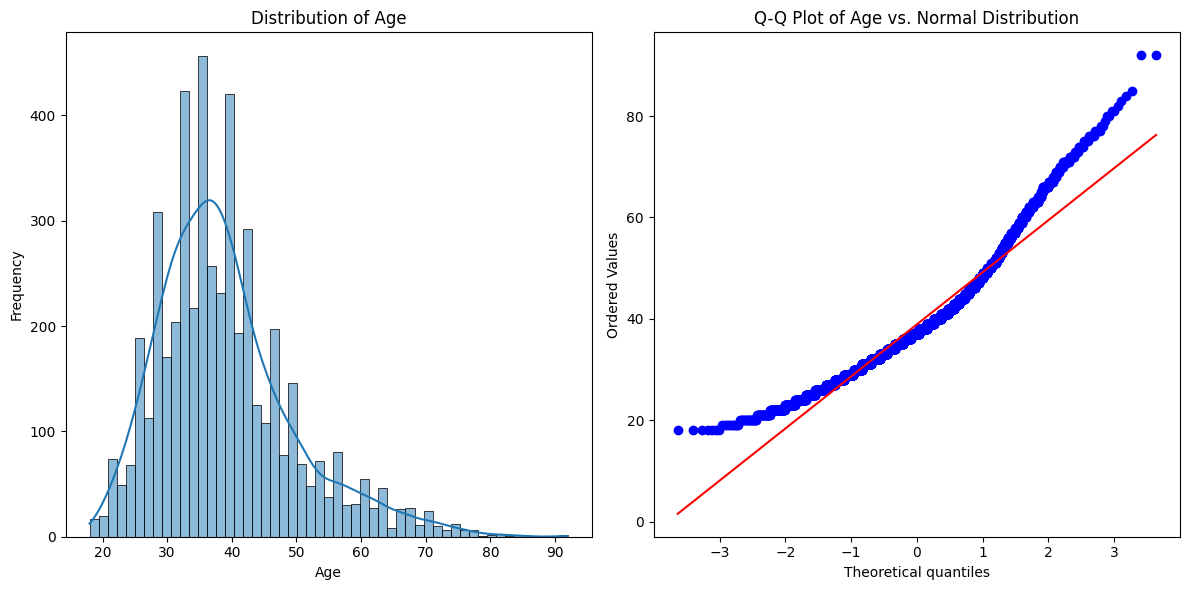

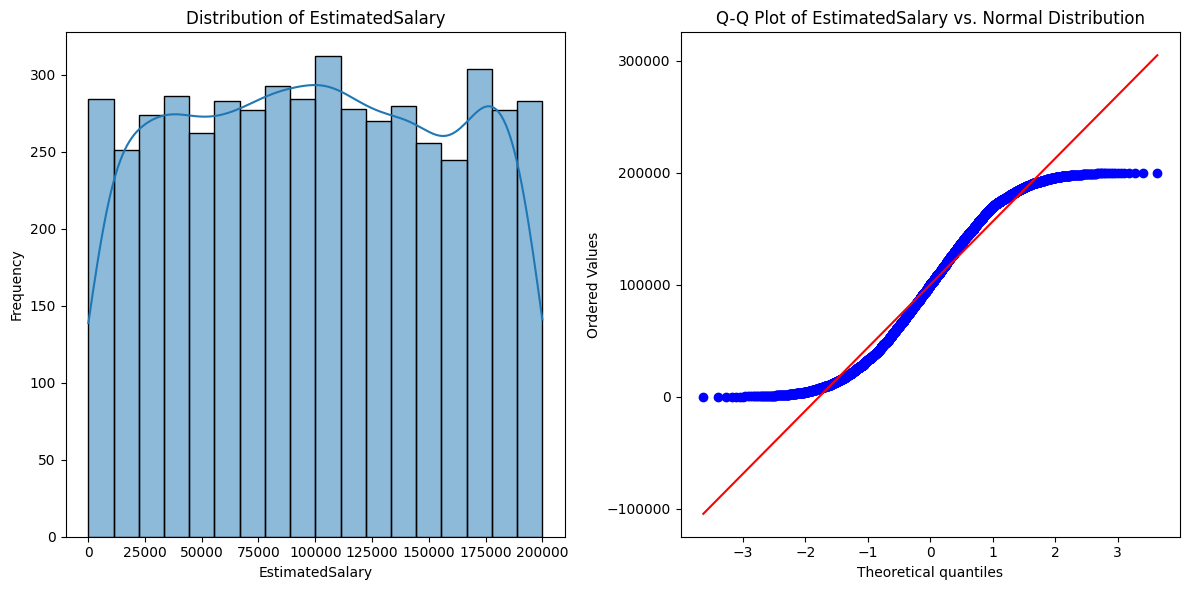

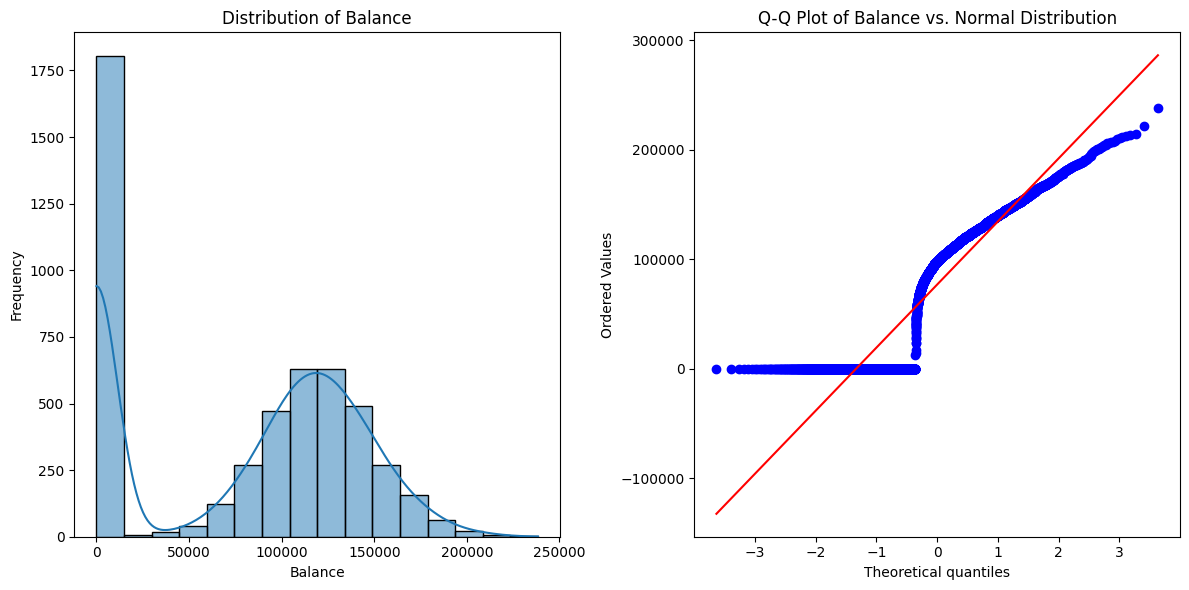

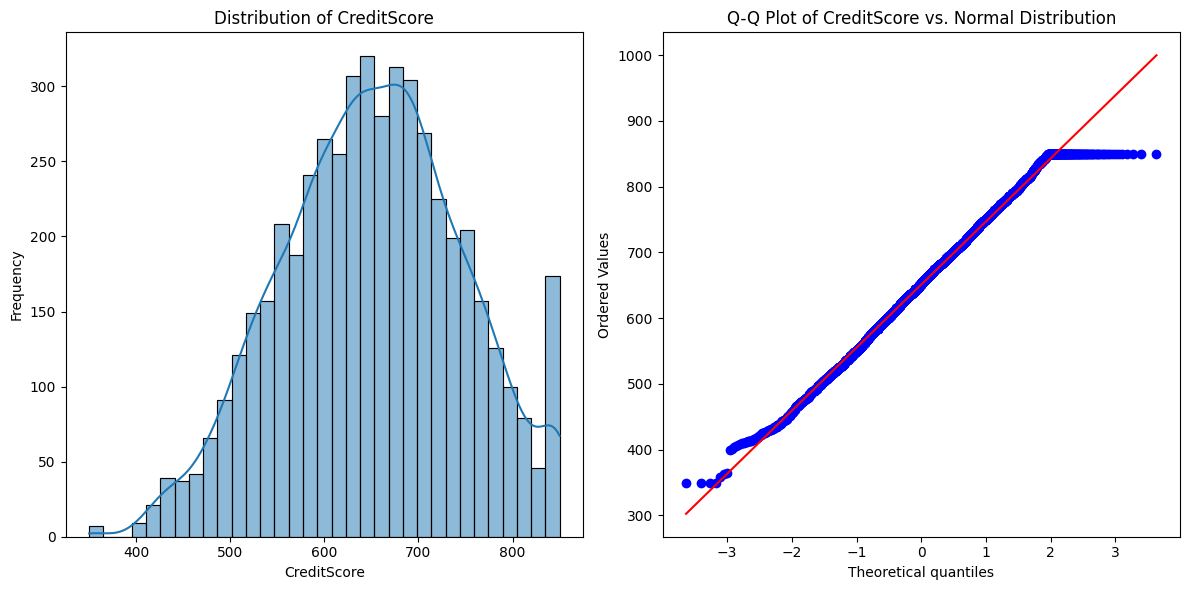

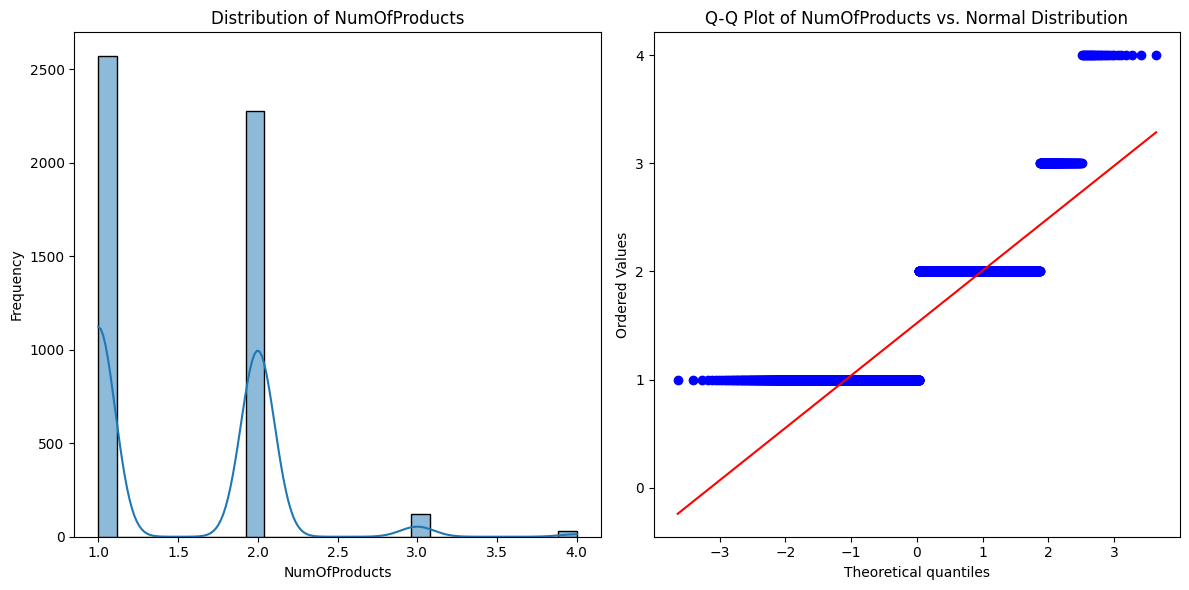

In [184]:
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    sns.histplot(df[col], kde=True, ax=axes[0]) 
    axes[0].set_title(f'Distribution of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')

    stats.probplot(df[col], dist="norm", plot=axes[1]) 
    axes[1].set_title(f'Q-Q Plot of {col} vs. Normal Distribution')

    plt.tight_layout()
    plt.show()

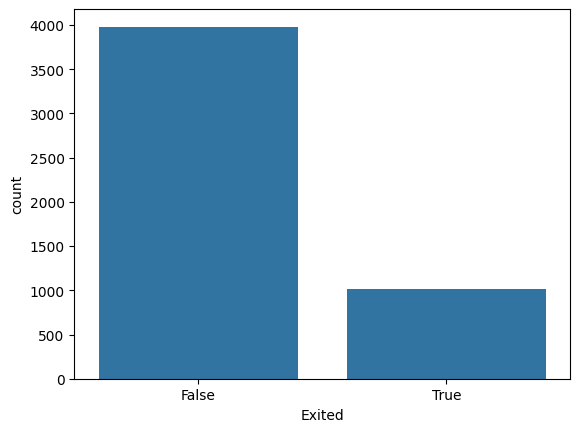

In [185]:
sns.countplot(x='Exited', data=df)
plt.show()

In [186]:
print("Value counts and percentage for {target_col}:")

value_counts = df[target_col].value_counts()
percentage = df[target_col].value_counts(normalize=True) * 100

result = pd.DataFrame({
    'Count': value_counts,
    'Percentage (%)': np.ceil(percentage)
})

result

Value counts and percentage for {target_col}:


,Count,Percentage (%)
Exited,,
False,3981,80.0
True,1018,21.0


In [187]:
print(df[df['Balance'] == 0]['Exited'].value_counts())

Exited
False    1541
True      260
Name: count, dtype: int64


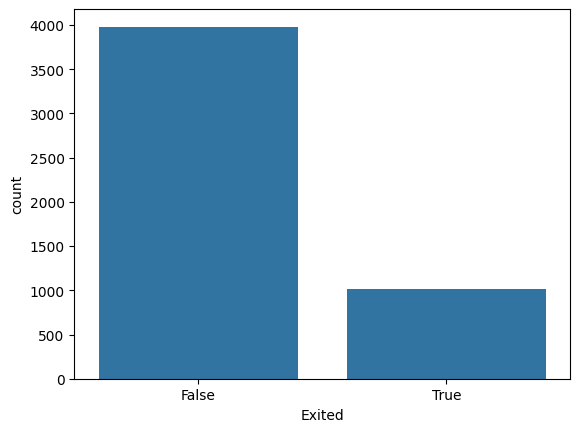

In [188]:
sns.countplot(x='Exited', data=df)
plt.show()

In [189]:
pd.crosstab(df['Geography'], df['Exited'], normalize='index') * 100

Exited,False,True
Geography,,
France,83.638535,16.361465
Germany,67.993631,32.006369
Spain,83.346872,16.653128


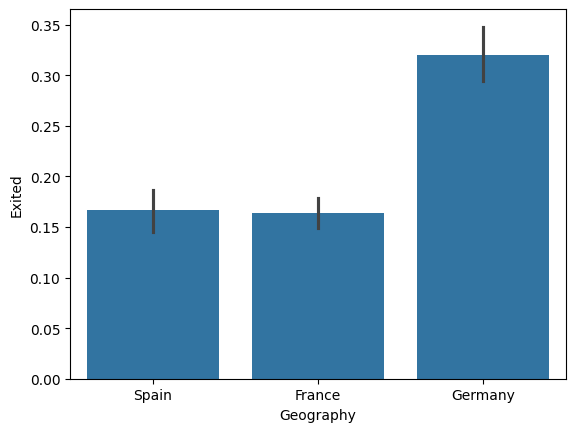

In [190]:
sns.barplot(x='Geography', y='Exited', data=df)
plt.show()

c:\Users\iman.hadi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\iman.hadi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


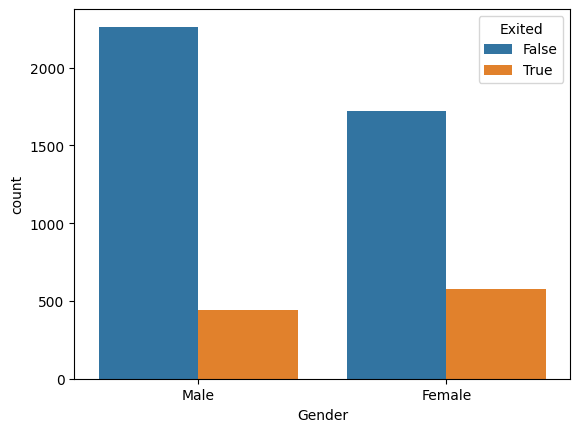

In [191]:
sns.countplot(x='Gender', hue='Exited', data=df)
plt.show()


c:\Users\iman.hadi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\iman.hadi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\iman.hadi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = gr

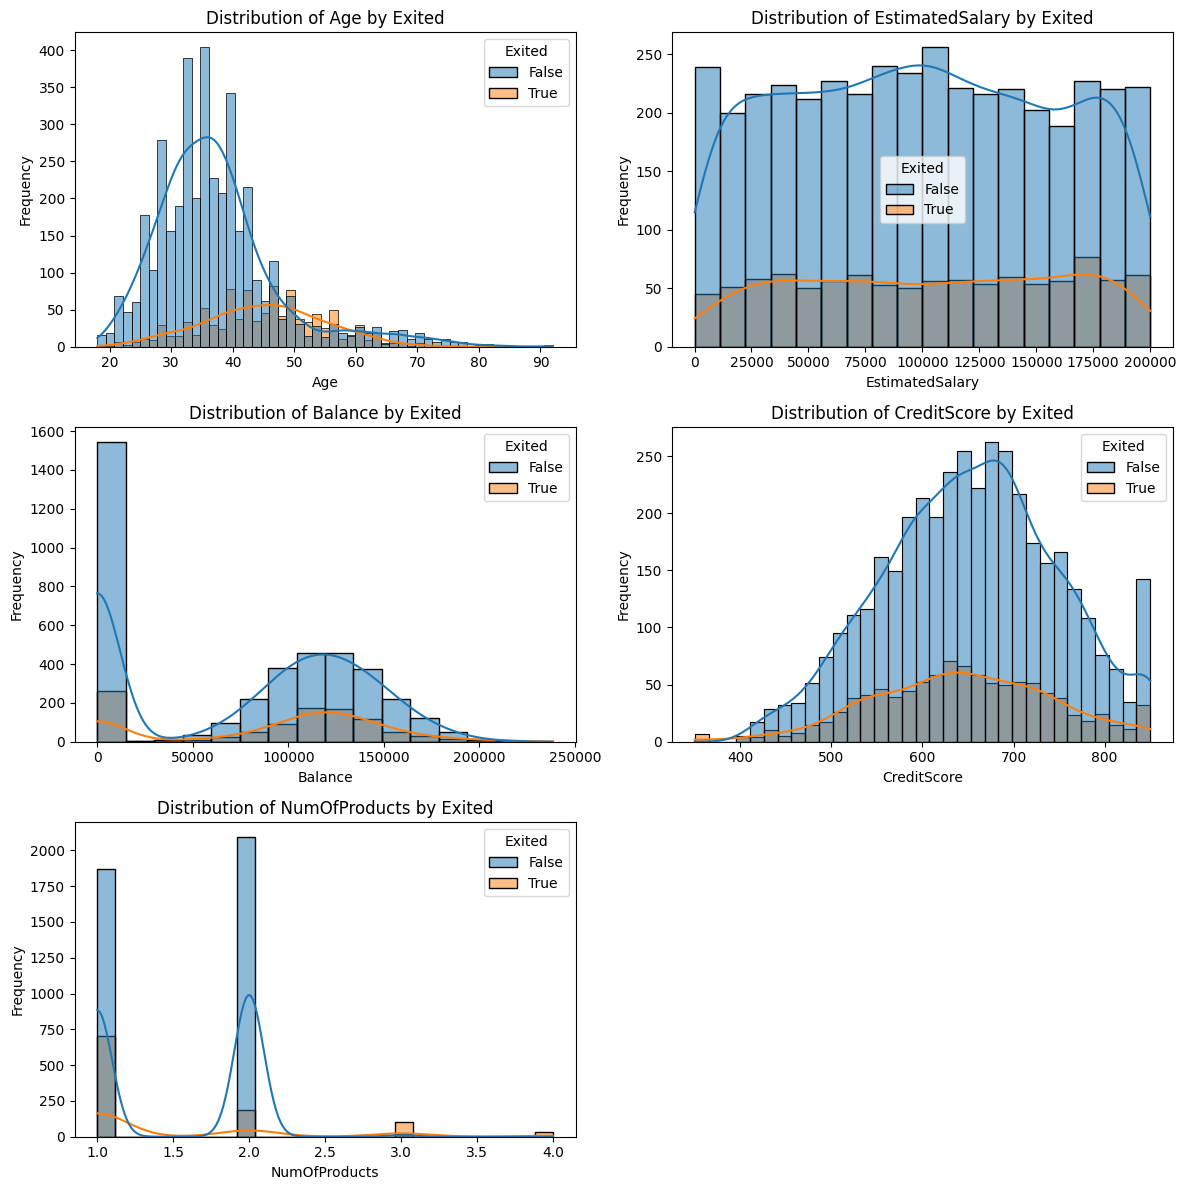

In [192]:
n_cols = 2
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()  

for ax, col in zip(axes, numerical_cols):
    sns.histplot(data=df, x=col, hue='Exited', kde=True, ax=ax)
    ax.set_title(f'Distribution of {col} by Exited')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  
plt.show()


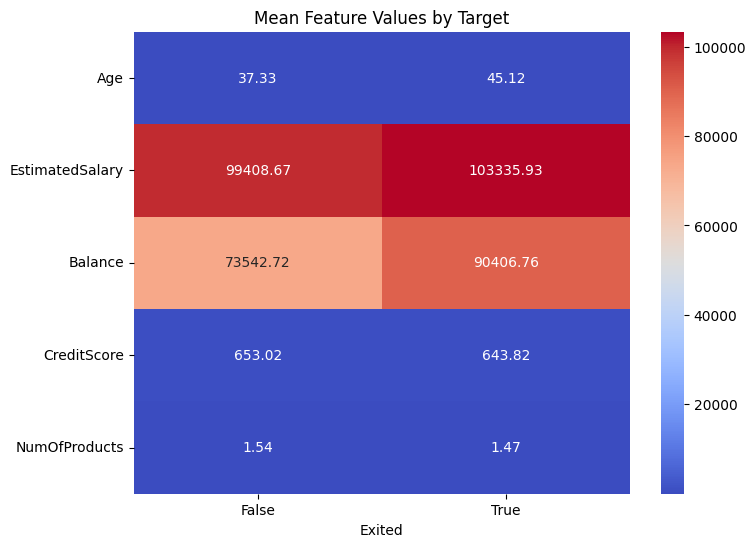

In [193]:
mean_df = df[numerical_cols+[target_col]].groupby('Exited').mean().T  

plt.figure(figsize=(8, 6))
sns.heatmap(mean_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mean Feature Values by Target')
plt.show()

<ul>
    <li><strong>Age</strong>: Individuals categorized as <strong>True</strong> tend to be older on average than those categorized as <strong>False</strong>.</li>
    <li><strong>Estimated Salary</strong>: There’s a slight increase in average salary for the <strong>True</strong> category compared to <strong>False</strong>.</li>
    <li><strong>Balance</strong>: There’s a notable increase in average balance for those labeled <strong>True</strong>.</li>
    <li><strong>Credit Score</strong>: The mean credit score is slightly lower for the <strong>True</strong> category, suggesting that those with a <strong>True</strong> label may have lower credit scores compared to those with a <strong>False</strong> label.</li>
</ul>
